# Manipulating Opera Phenix Analysis Data 
#### (Example: Determining Nuclear Count from Text File Data)

* Python is a relatively user-friendly, readable programming language
* Importing Opera Phenix text file data and manipulating it into something useful takes only a few lines of code
* Although Python is well equipped to manipulate data from a text file to an excel file, it is capable of much much more!

In [1]:
from helperFunctions import get_file, get_folder, saveas_filename
import pandas as pd
import os
from matplotlib import pyplot as plt

In [5]:
#select a file
filename = get_file() 

In [6]:
filename

'C:/Users/Ben/Desktop/capb/2018-10-10 MCF7 for Corteva.txt'

In [7]:
#import data into a dataframe, the separator in this example is a tab (\t) and the headers are on row 9 (python is 0 indexed so row 1 in the text file is row 0 to python)
data = pd.read_csv(filename, sep='\t', header=9) 

In [8]:
#preview the first 5 rows of the dataframe to make sure it imported correctly
data.head()

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Position X [µm],Position Y [µm],Compound,Concentration,Cell Type,Cell Count,Good-Questionable Wells,Replicate,Nuclei - ROI No
0,1,5,16,0,4,1,632,361,"[624,354,639,371]",-556.17,-663.26,DCC,0.0,MCF7,NaN,Good,1.0,1
1,1,5,16,0,4,2,621,387,"[613,372,641,400]",-559.86,-677.94,DCC,0.0,MCF7,NaN,Good,1.0,1
2,1,5,16,0,4,3,599,387,"[582,379,613,400]",-576.33,-678.59,DCC,0.0,MCF7,NaN,Good,1.0,1
3,1,5,16,0,4,4,578,400,"[571,393,586,407]",-587.22,-685.11,DCC,0.0,MCF7,NaN,Good,1.0,1
4,1,5,16,0,4,5,612,403,"[602,395,621,412]",-568.50,-687.56,DCC,0.0,MCF7,NaN,Good,1.0,1


In [9]:
#group the data you are interested in. In this example, each instance of the nuclei - ROI No column is summed to get the total number of nuclei
#the groupby function essentially splits the data into groups that you specify and then can perform calculations on those groups
#if you want to get the sum of variable1 when variable2,3,4 are grouped together then you would use data.groupby(['variable2', 'variable3', 'variable4'])['variable1'].sum()
extracted_data = data.groupby(['Row', 'Column', 'Field', 'Concentration', 'Cell Type', 'Replicate', 'Compound'], as_index=False)['Nuclei - ROI No'].sum()

In [10]:
extracted_data.head()

,Row,Column,Field,Concentration,Cell Type,Replicate,Compound,Nuclei - ROI No
0,1,5,1,0.0,MCF7,1.0,DCC,442
1,1,5,2,0.0,MCF7,1.0,DCC,210
2,1,5,3,0.0,MCF7,1.0,DCC,306
3,1,5,4,0.0,MCF7,1.0,DCC,304
4,1,6,1,0.0,MCF7,2.0,DCC,527


In [11]:
#rename the Nuclei - ROI No column to Nuclear Count
extracted_data.rename(columns = {'Nuclei - ROI No':'Nuclear Count'}, inplace = True)

In [12]:
extracted_data.head()

,Row,Column,Field,Concentration,Cell Type,Replicate,Compound,Nuclear Count
0,1,5,1,0.0,MCF7,1.0,DCC,442
1,1,5,2,0.0,MCF7,1.0,DCC,210
2,1,5,3,0.0,MCF7,1.0,DCC,306
3,1,5,4,0.0,MCF7,1.0,DCC,304
4,1,6,1,0.0,MCF7,2.0,DCC,527


In [13]:
grouped = extracted_data.groupby(['Compound', 'Concentration'])['Nuclear Count']

In [14]:
summary = grouped.aggregate(['mean', 'std'])
summary.head()

mean        std
Compound Concentration                       
DCC      0.0            355.400000  77.654701
DPN      0.1            295.833333  74.555450
         1.0            286.583333  68.889184
         3.0            314.125000  40.818194
         10.0           285.666667  73.874997

In [15]:
means = grouped.mean()
means.head()

Compound  Concentration
DCC       0.0              355.400000
DPN       0.1              295.833333
          1.0              286.583333
          3.0              314.125000
          10.0             285.666667
Name: Nuclear Count, dtype: float64

In [16]:
stds = grouped.std()
stds.head()

Compound  Concentration
DCC       0.0              77.654701
DPN       0.1              74.555450
          1.0              68.889184
          3.0              40.818194
          10.0             73.874997
Name: Nuclear Count, dtype: float64

In [17]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

C:\ProgramData\Anaconda3\envs\capb\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


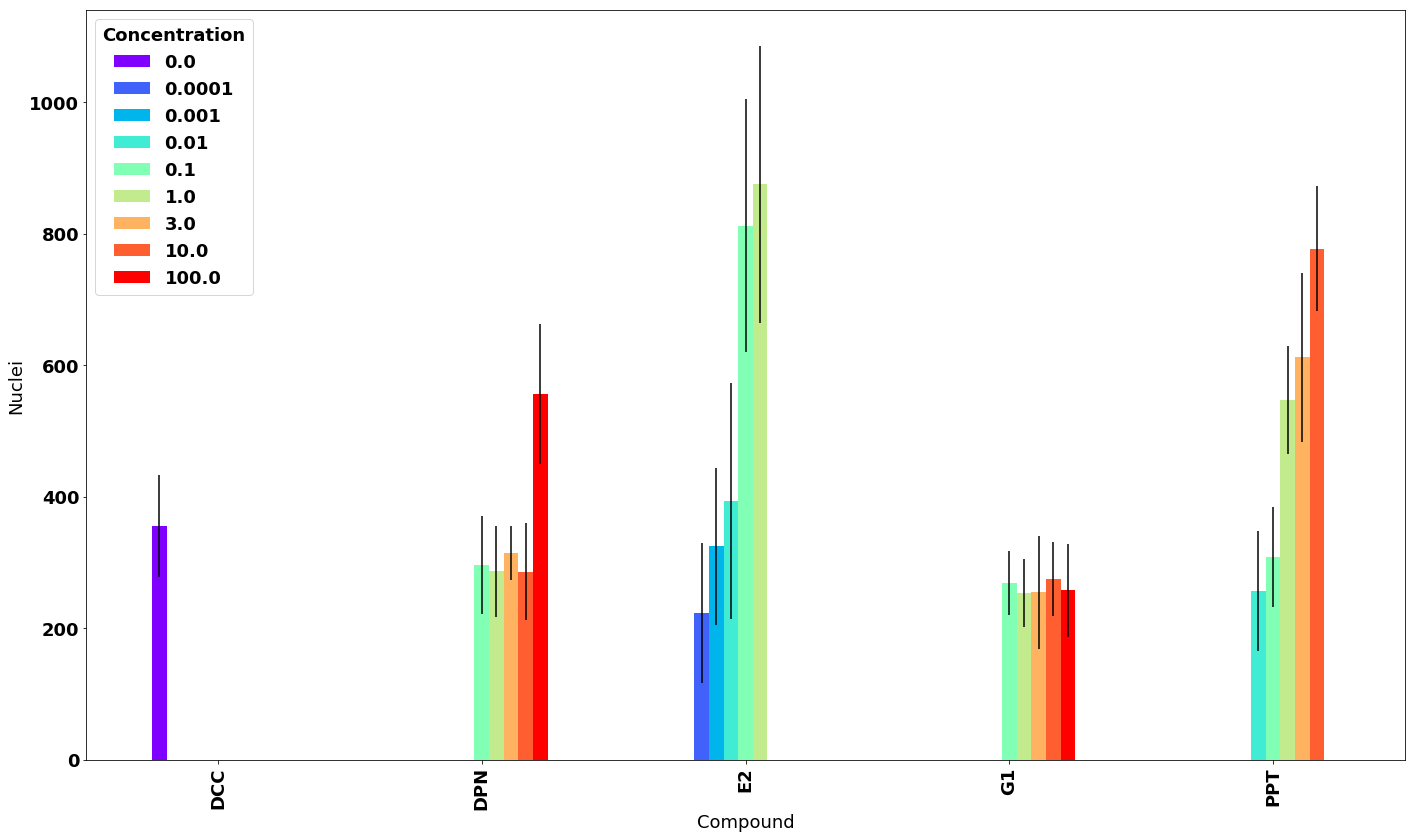

In [18]:
fig, ax = plt.subplots(figsize=(20,12));
ax = means.unstack().plot(kind='bar', ax=ax, yerr=stds.unstack(), colormap='rainbow')
ax.set_ylabel('Nuclei')
fig.tight_layout()
#plt.legend(loc='upper left')
plt.show()


In [19]:
compounds = extracted_data['Compound'].unique()

C:\ProgramData\Anaconda3\envs\capb\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


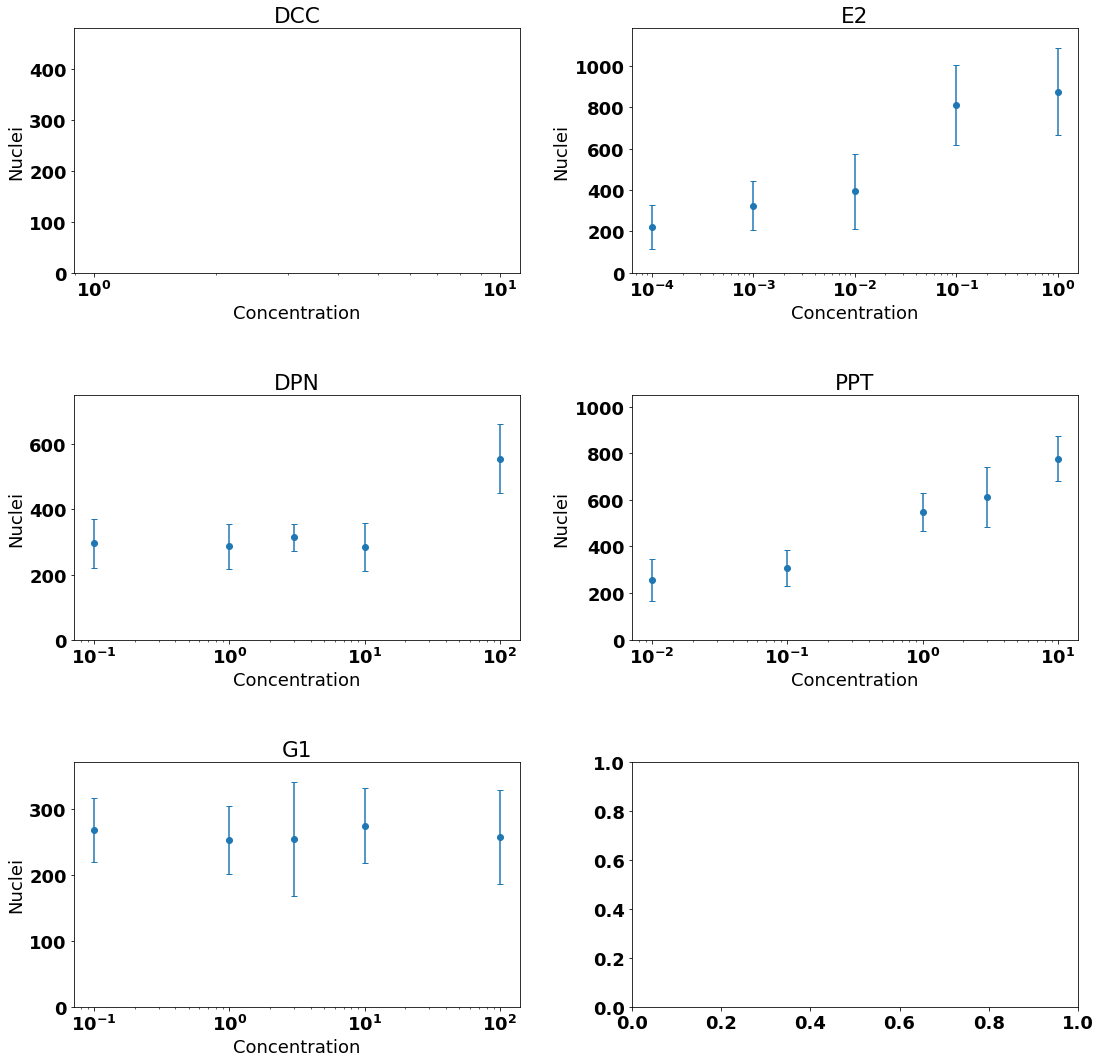

In [20]:
fig, axs = plt.subplots(int(pd.np.ceil(len(compounds)/2)),int(pd.np.floor(len(compounds)/2)), figsize=(18, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.25)
axs = axs.ravel()
for inx,compound in enumerate(compounds):
    ax = axs[inx]
    x = means[compound].reset_index()['Concentration'].tolist()
    y = means[compound].reset_index()['Nuclear Count'].tolist()
    err = stds[compound].reset_index()['Nuclear Count'].tolist()
    ax.errorbar(x,y, yerr=err, linestyle='none', marker='o', capsize=3)
    ax.set_xscale('log')
    ax.set_title(compound)
    ax.set_ylabel('Nuclei')
    ax.set_xlabel('Concentration')
    ax.set_ylim(0,max(y)*1.35)

In [ ]:
data.head()

In [ ]:
extracted_data.head()

In [ ]:
summary.head()

In [ ]:
summary.rename(columns={'mean':'Average Nuclear Count', 'std':'Standard Deviation'}, inplace=True)
summary.head()

In [ ]:
summary.reset_index(inplace=True)
summary

In [ ]:
suggested = os.path.split(os.path.splitext(filename)[0])[1].replace(" ", "")+'.xlsx'
suggested

In [ ]:
savefilename = saveas_filename()

In [ ]:
writer = pd.ExcelWriter(savefilename, engine='xlsxwriter')

In [ ]:
summary.to_excel(writer, sheet_name='summary')
extracted_data.to_excel(writer, sheet_name='binned_data')
data.to_excel(writer, sheet_name='raw_data')

In [ ]:
sheet3 = writer.sheets['raw_data']
sheet2 = writer.sheets['binned_data']
sheet1 = writer.sheets['summary']

In [ ]:
def get_column_width(dataframe):
    return [max([len(str(i))*1.25 for i in dataframe.index.values])]+[len(str(i))*1.25 for i in dataframe.columns]

column_widths_3 = get_column_width(data)
column_widths_2 = get_column_width(extracted_data)
column_widths_1 = get_column_width(summary)


In [ ]:
[sheet1.set_column(i,i,width) for i, width in enumerate(column_widths_1)]
[sheet2.set_column(i,i,width) for i, width in enumerate(column_widths_2)]
[sheet3.set_column(i,i,width) for i, width in enumerate(column_widths_3)];

In [ ]:
writer.save()